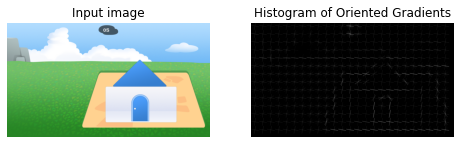

In [10]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.feature import hog
from skimage import data, exposure

image = imread('./wKgIb2CjYnCAP8DtAAUjHcaD3v4926.png')
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(50,50),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [2]:
# dataset id
dsid = 'NATOPS' 
X, y, splits = get_UCR_data(dsid, return_split=False)
X.shape, y.shape, splits

((360, 24, 51),
 (360,),
 ((#180) [0,1,2,3,4,5,6,7,8,9...],
  (#180) [180,181,182,183,184,185,186,187,188,189...]))

In [5]:
tfms  = [None, [Categorize()]]

dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
print(tfms)

[None, [Categorize -- {'vocab': None, 'sort': True, 'add_na': False}:
encodes: (Tabular,object) -> encodes
(object,object) -> encodes
decodes: (Tabular,object) -> decodes
(object,object) -> decodes
]]


In [6]:
import cv2 as cv
import mediapipe as mp


In [27]:
def get_landmarks(img_path):
    x = []
    y = []
    z = []

    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    mp_face_mesh = mp.solutions.face_mesh

    with mp_face_mesh.FaceMesh(
            static_image_mode=True,
            max_num_faces=1,
            refine_landmarks=True,
            min_detection_confidence=0.5) as face_mesh:

        image = cv.imread(img_path)
        results = face_mesh.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))

        if not results.multi_face_landmarks:
            print("No landmarks")
            return 0, 0, 0

        for i in range(468):
            x.append(results.multi_face_landmarks[0].landmark[i].x)
            y.append(results.multi_face_landmarks[0].landmark[i].y)
            z.append(results.multi_face_landmarks[0].landmark[i].z)
        # print(x, y, z)

        # output face with 468 landmarks
        annotated_image = image.copy()
        for face_landmarks in results.multi_face_landmarks:
            # print('face_landmarks:', face_landmarks)
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_tesselation_style())
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_CONTOURS,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_contours_style())
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_IRISES,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_iris_connections_style())
        # cv.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
        # cv.imshow("Image", annotated_image)
        # cv.waitKey(0)
        # cv.destroyWindow()

        # x = np.array(x).reshape(468, 1)
        # y = np.array(y).reshape(468, 1)
        # z = np.array(z).reshape(468, 1)

        return x,y,z

def judge_face(img_path):
    judge = 1
    mp_face_detection = mp.solutions.face_detection
    mp_drawing = mp.solutions.drawing_utils
    # 0代表近景人脸，1代表远景
    with mp_face_detection.FaceDetection(
            model_selection=0, min_detection_confidence=0.5) as face_detection:

        image = cv.imread(img_path)
        # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
        results = face_detection.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        if not results.detections:
            judge = 0
        # print(results.detections)
    return judge

In [25]:
import numpy as np
x, y, z = get_landmarks('../muldataset/00002-0101/2021-05-17-15-18-19.png')
x_negative = [-x_value for x_value in x]



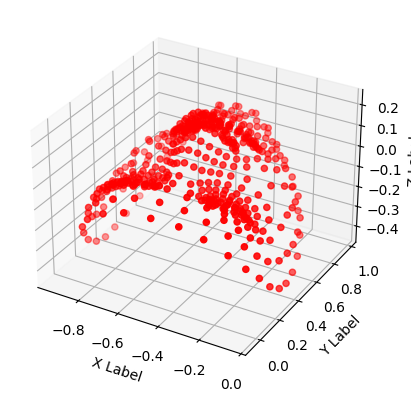

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_negative, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


In [34]:
import os
folder_list = os.listdir('../../Figure/Supplement/sup14_face/')
for f in folder_list:
    if '.jpg' in f:
        print(f)


anxiety.jpg
depression.jpg
emo.jpg
hostility.jpg
interpersonal sensitivity.jpg
maladaptation.jpg
obsession.jpg
overall.jpg
paranoia.jpg
psy.jpg
stress.jpg
suicide.jpg


anxiety.jpg


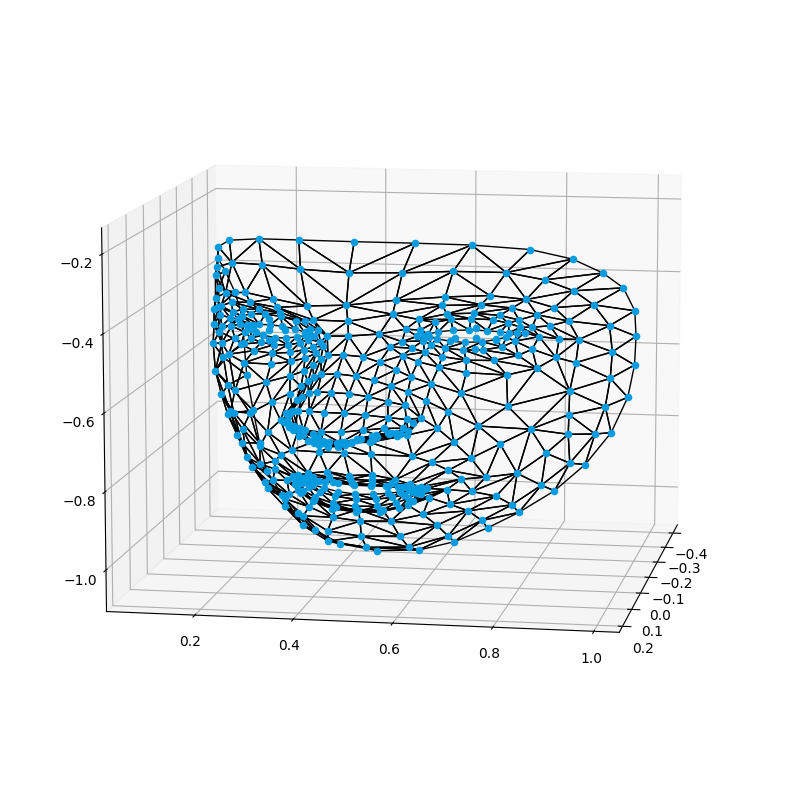

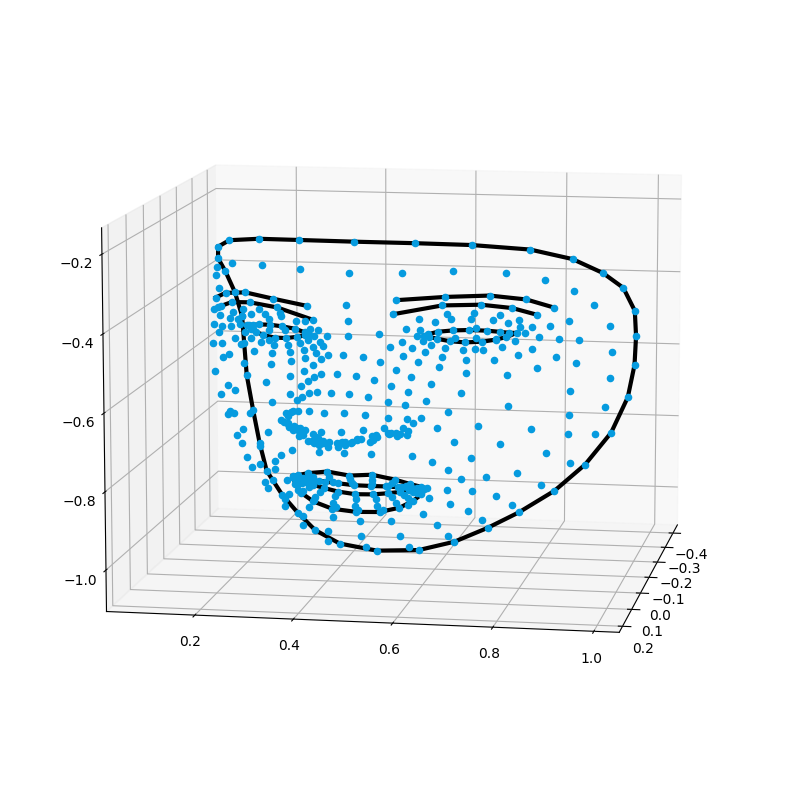

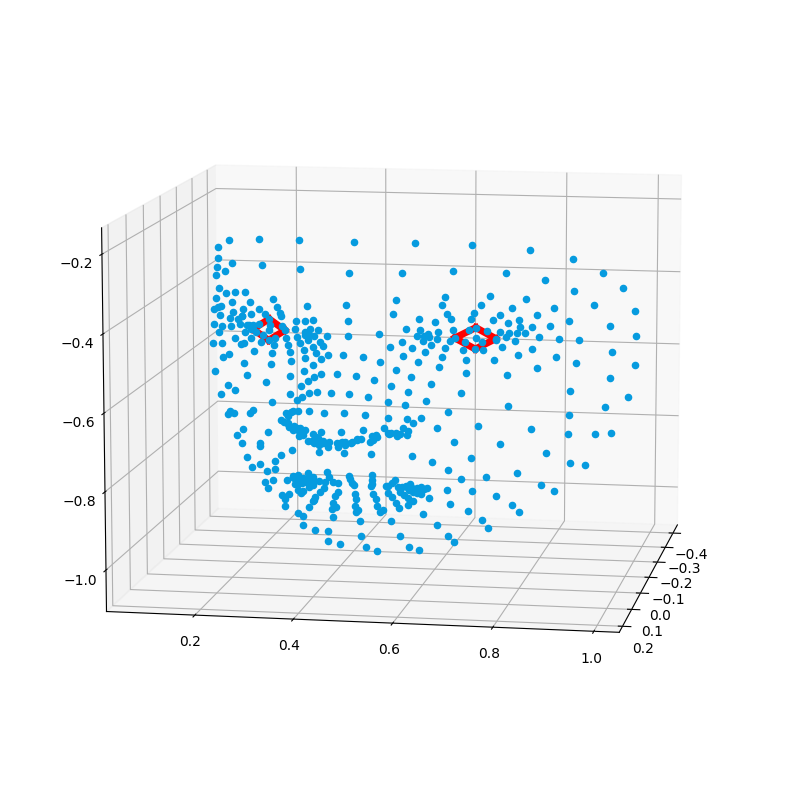

depression.jpg


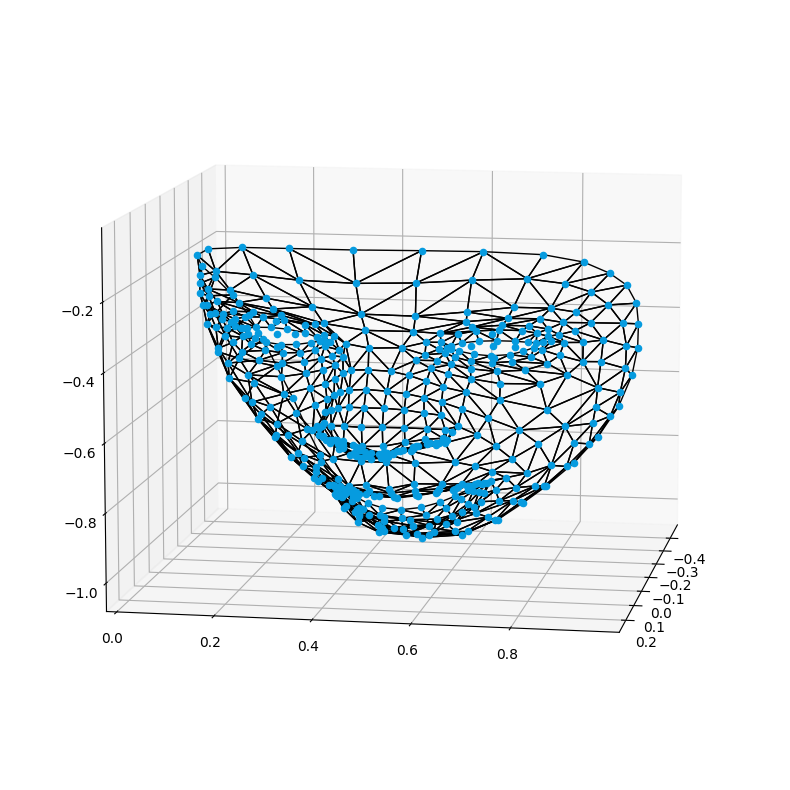

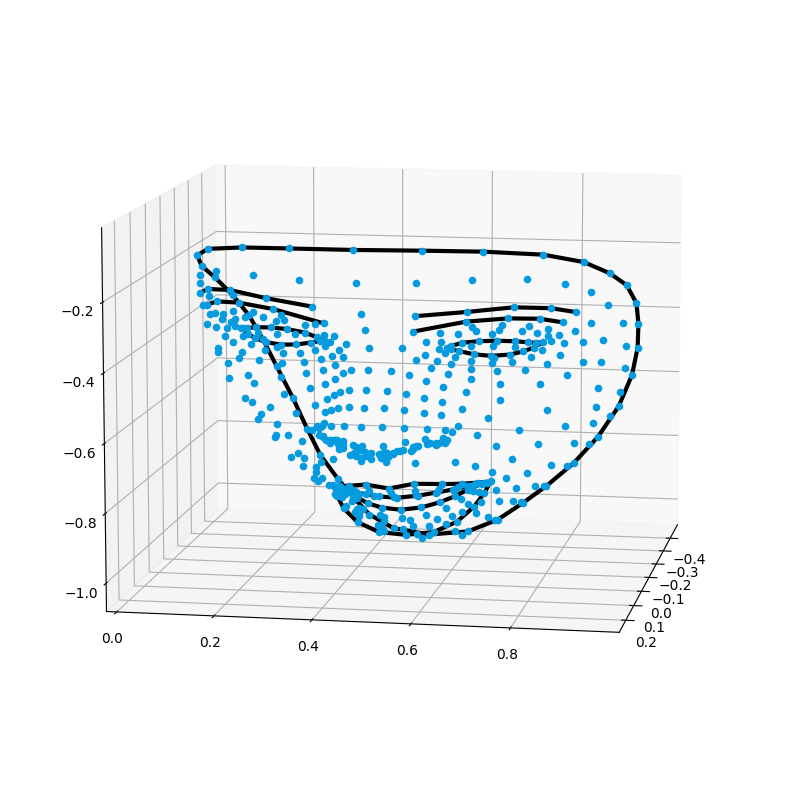

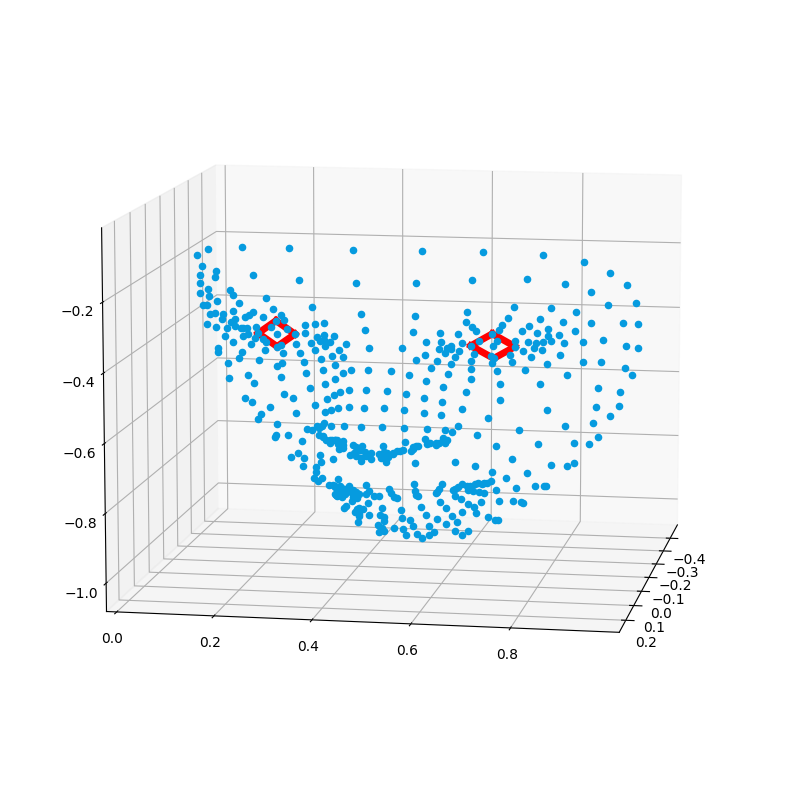

emo.jpg


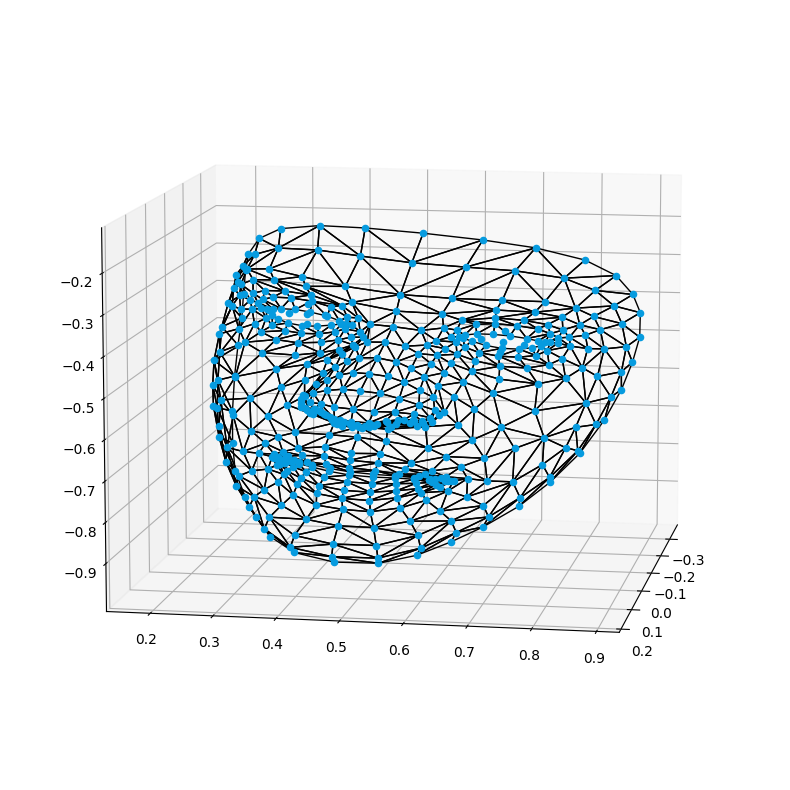

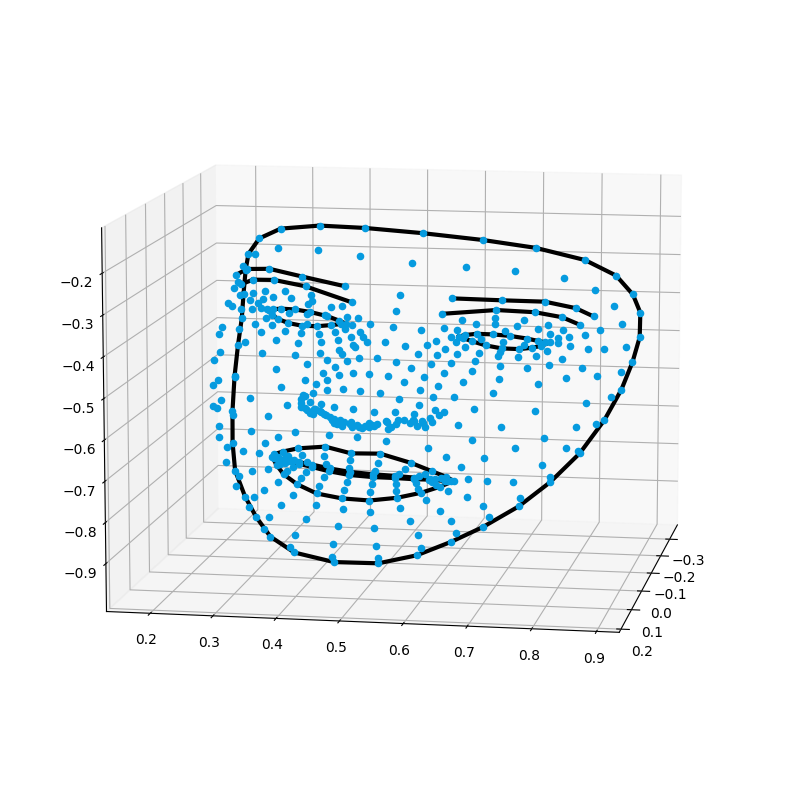

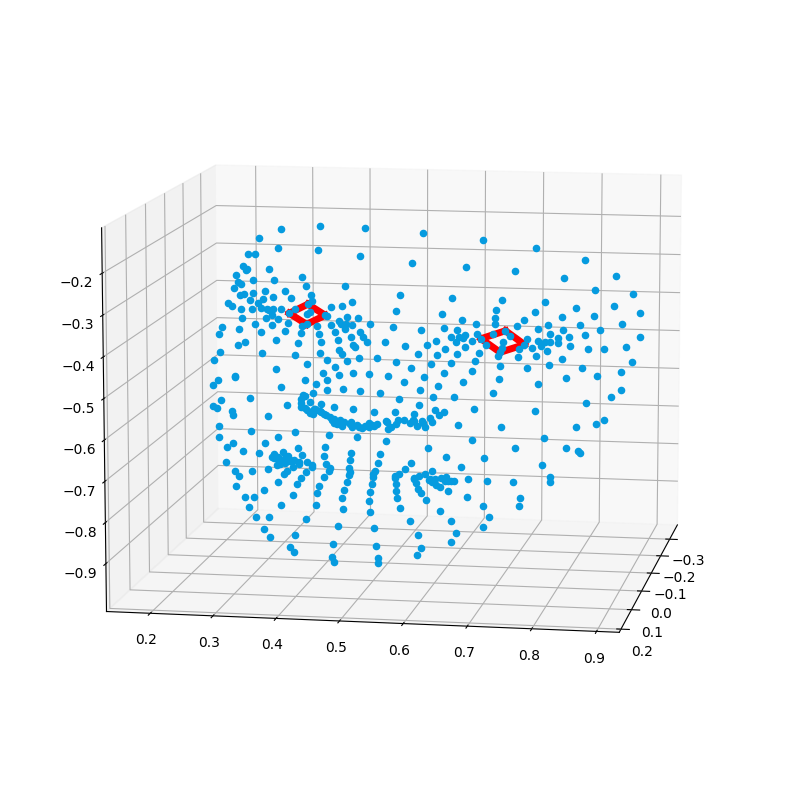

hostility.jpg


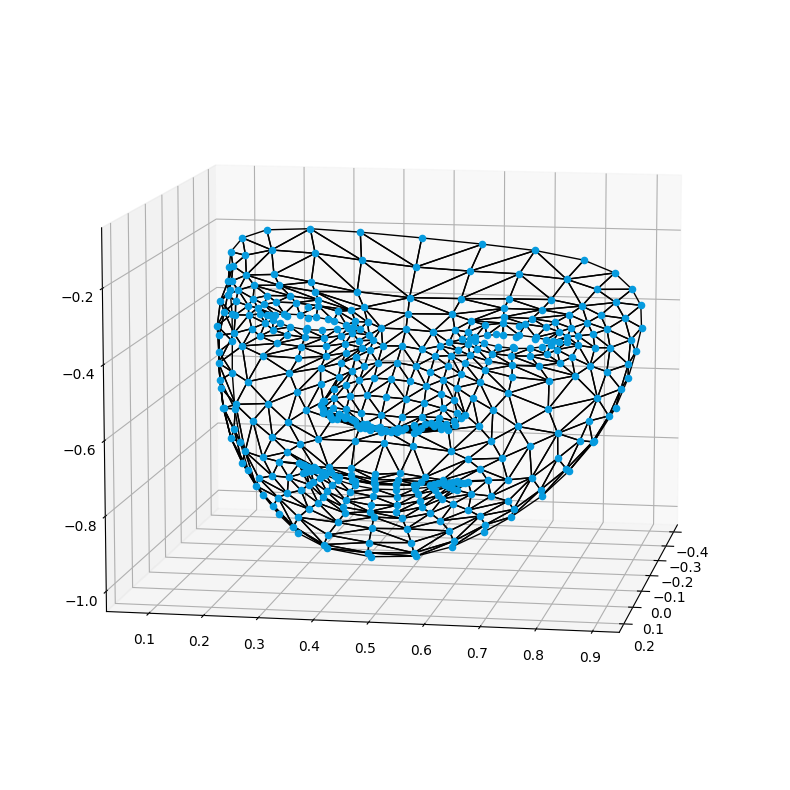

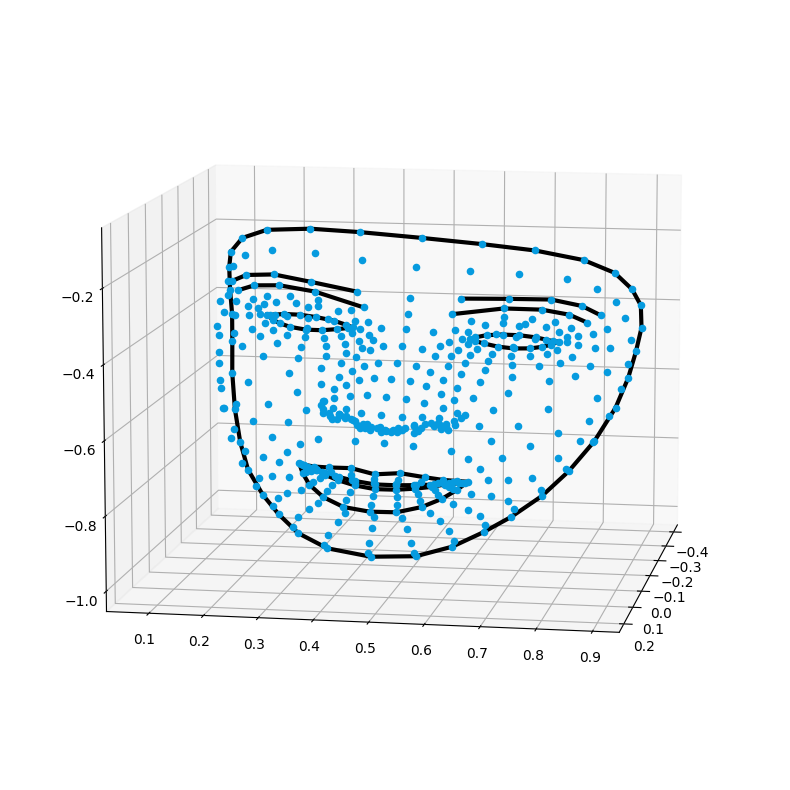

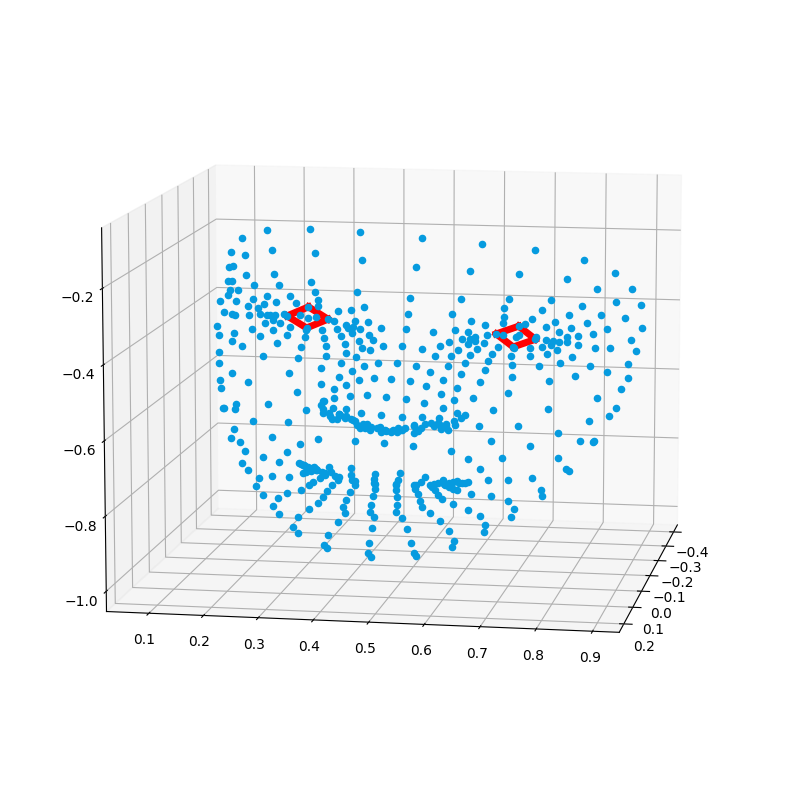

interpersonal sensitivity.jpg


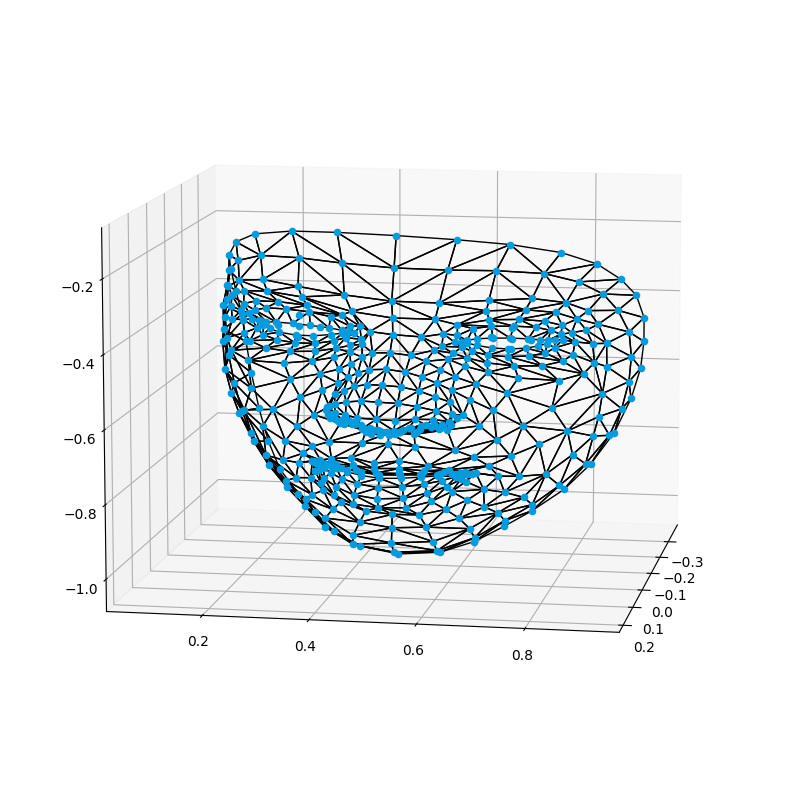

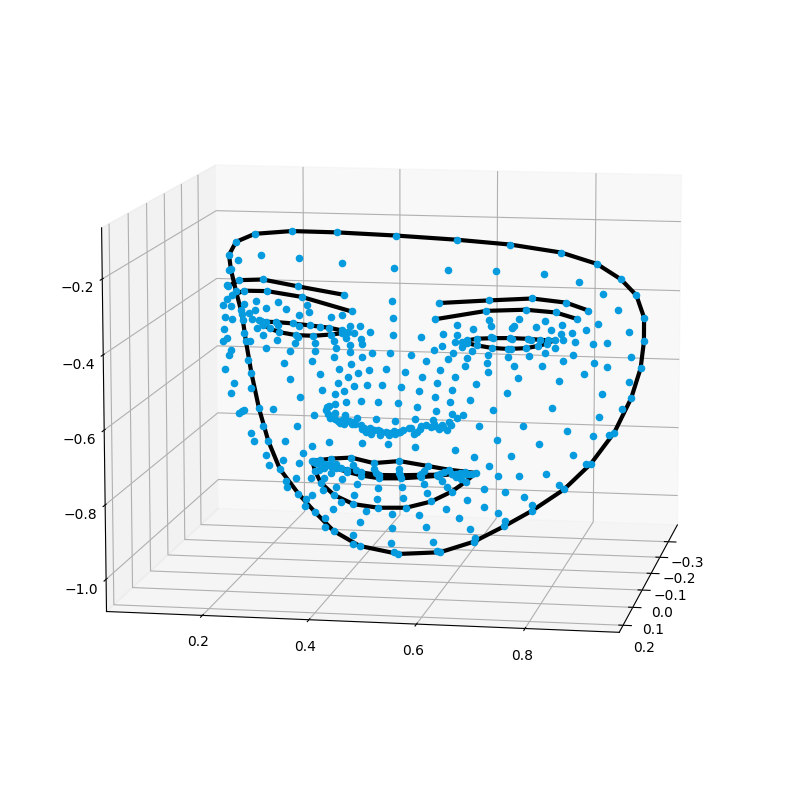

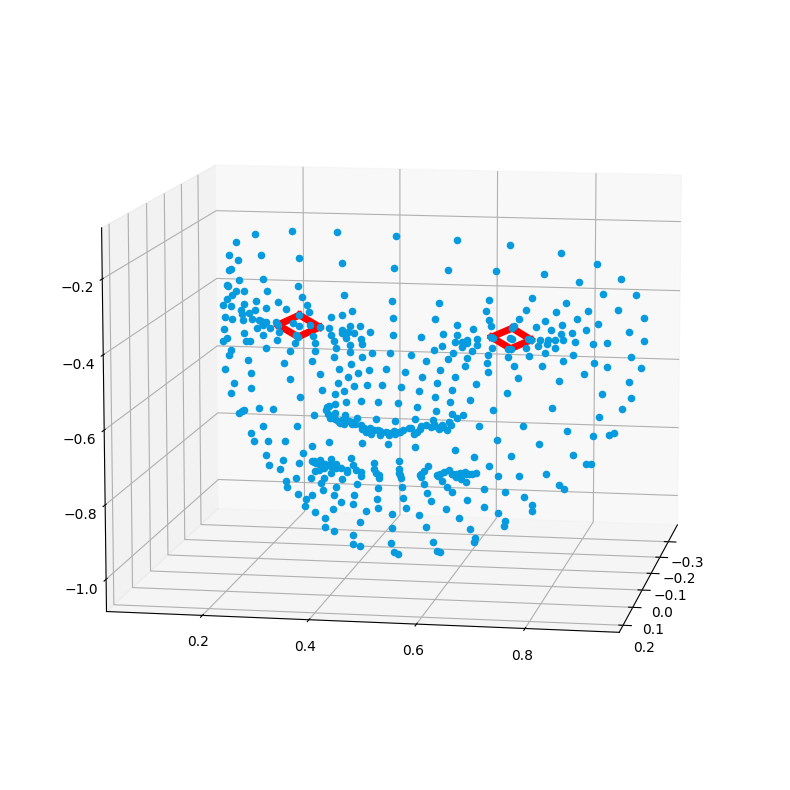

maladaptation.jpg


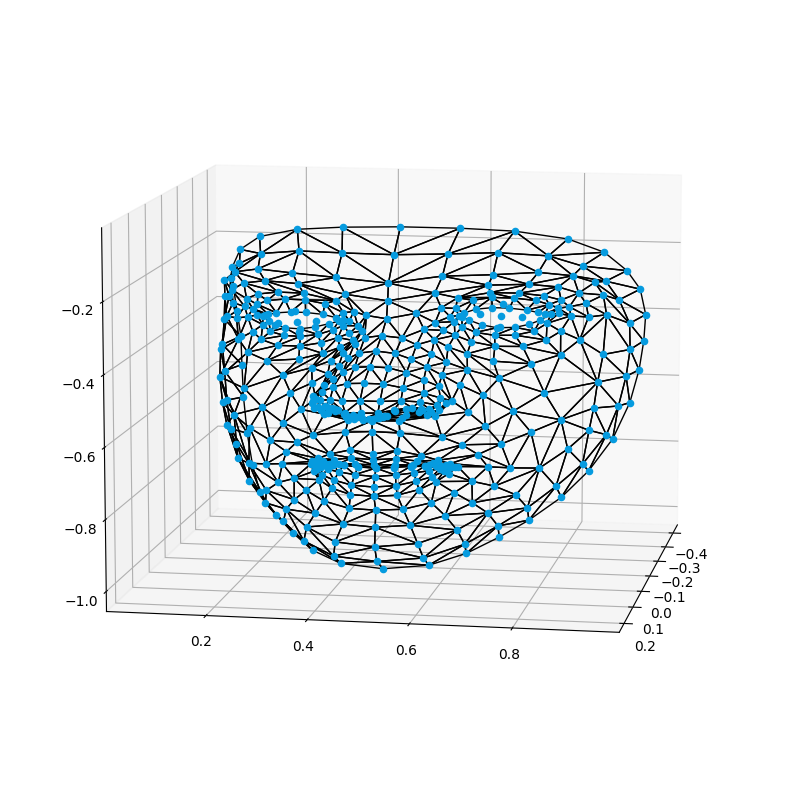

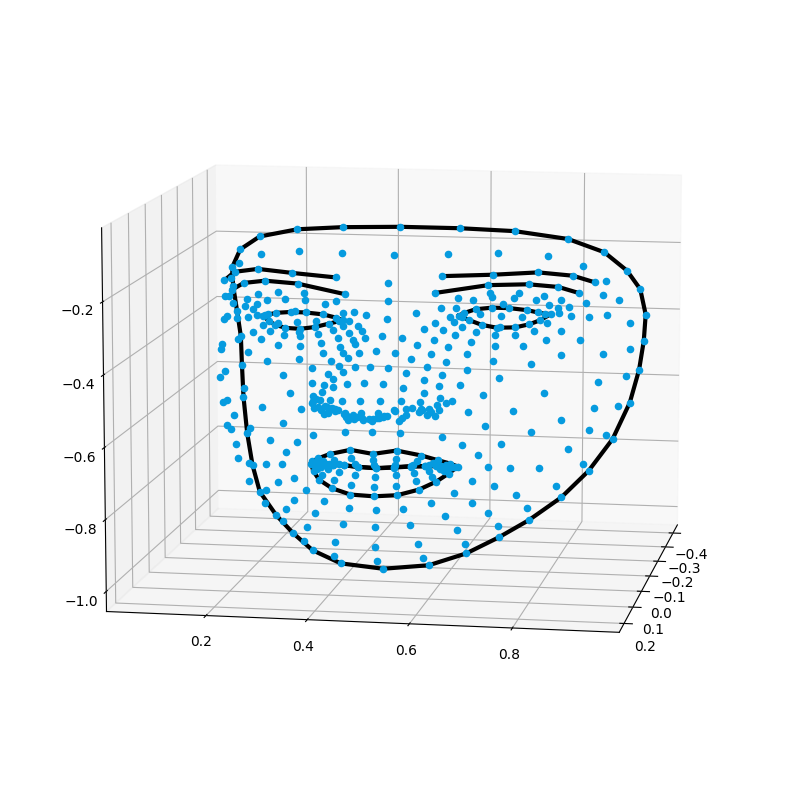

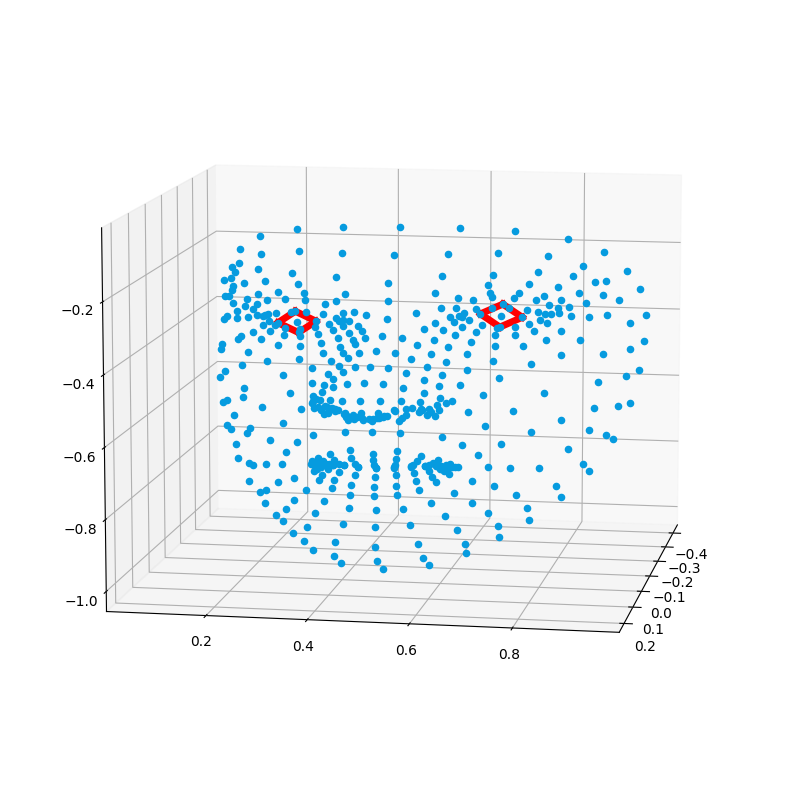

obsession.jpg


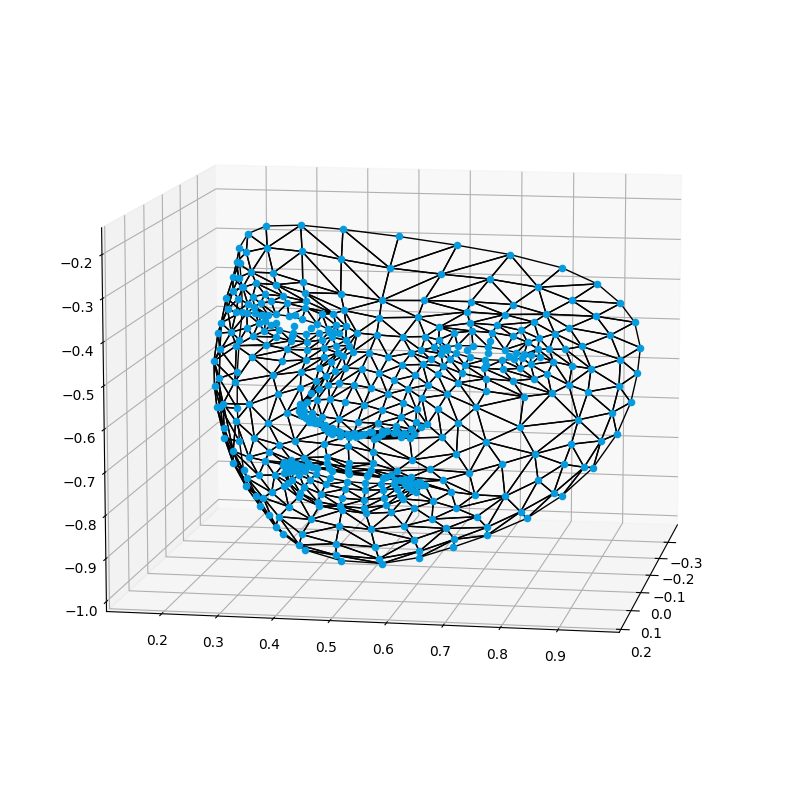

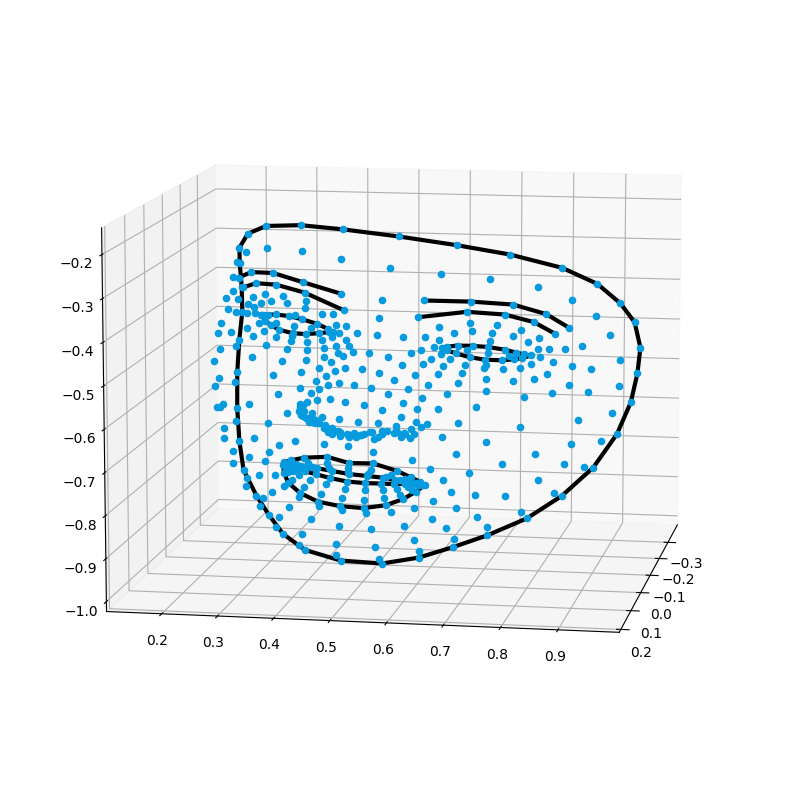

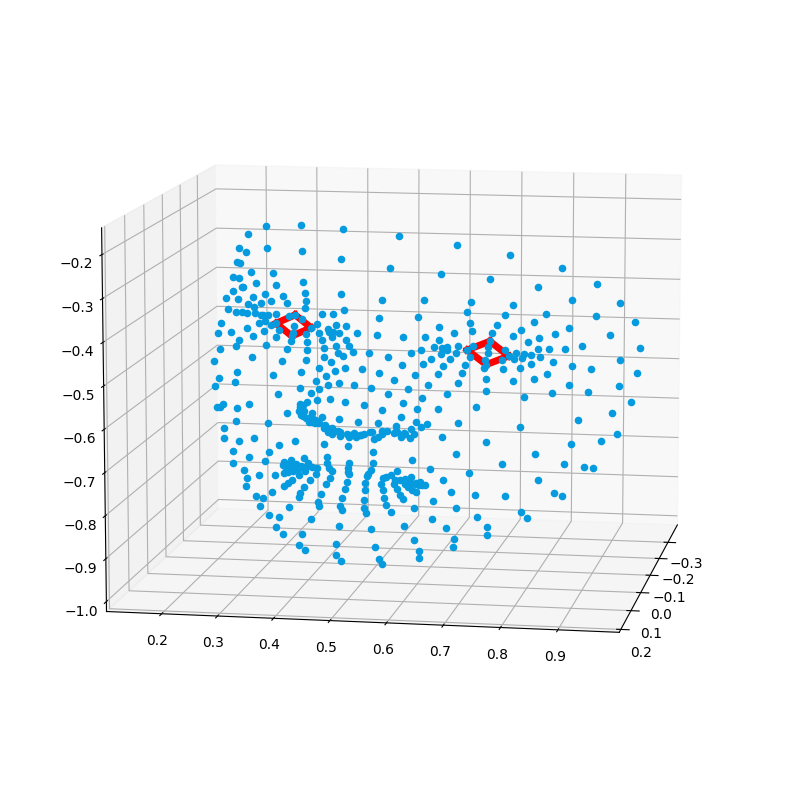

overall.jpg


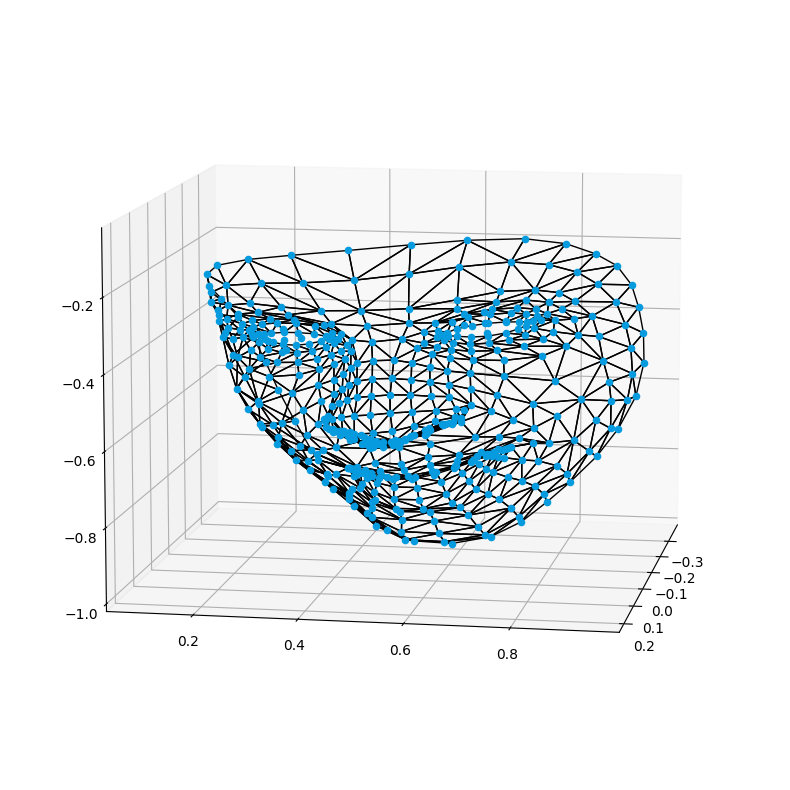

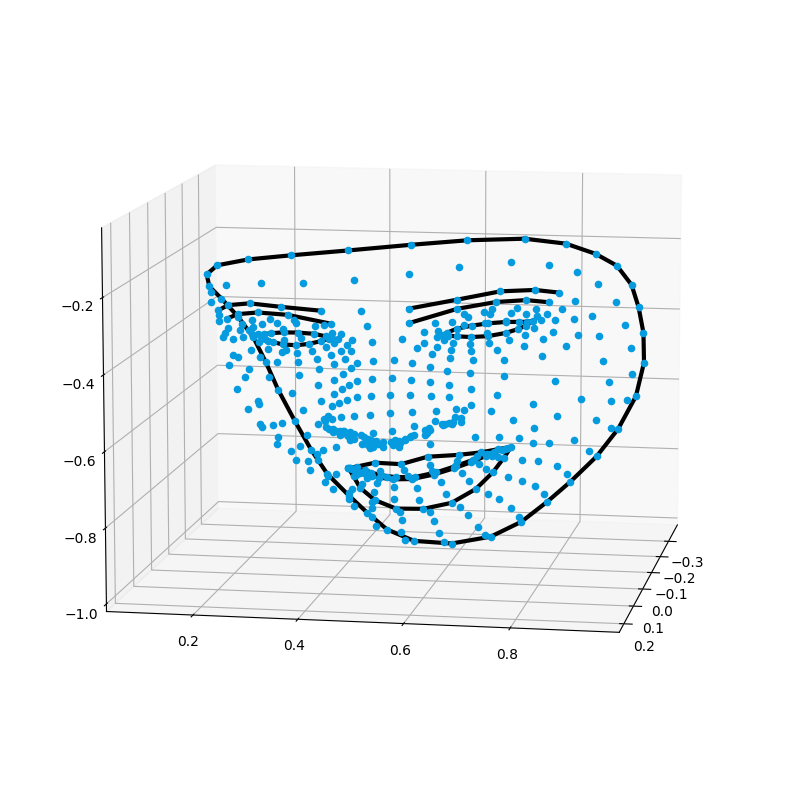

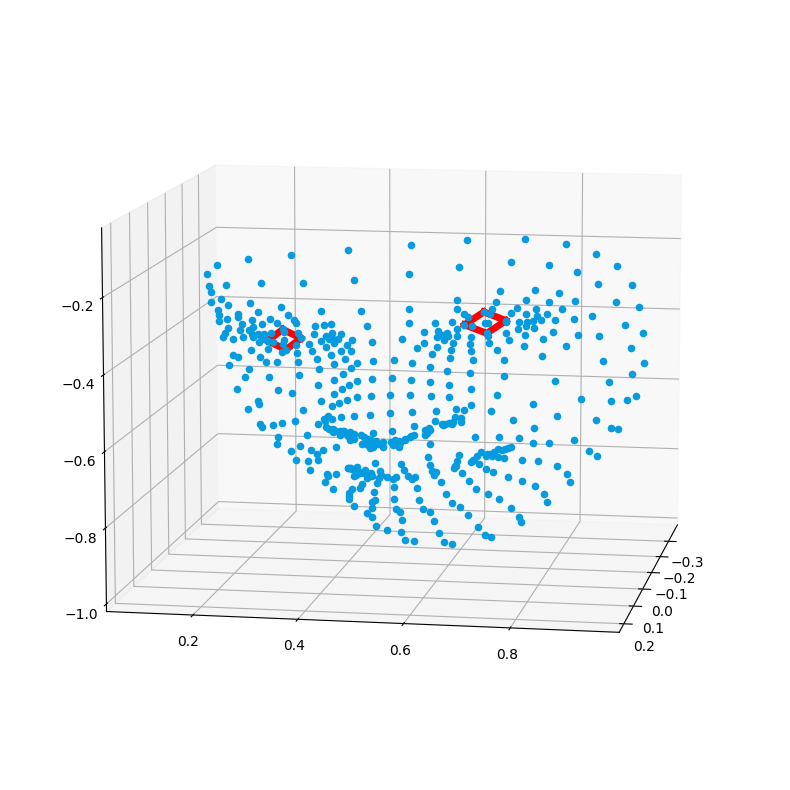

paranoia.jpg


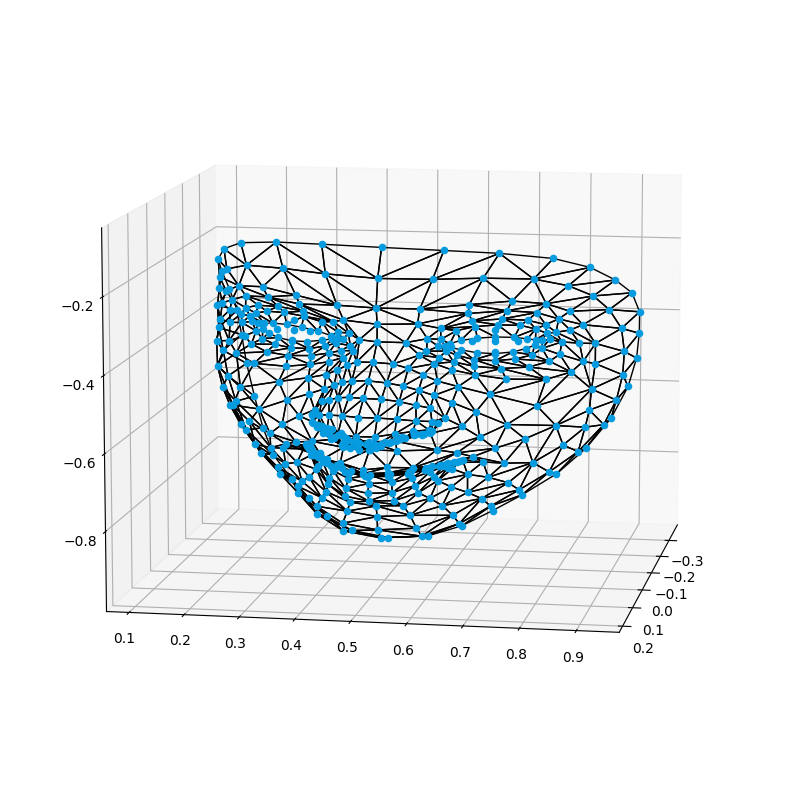

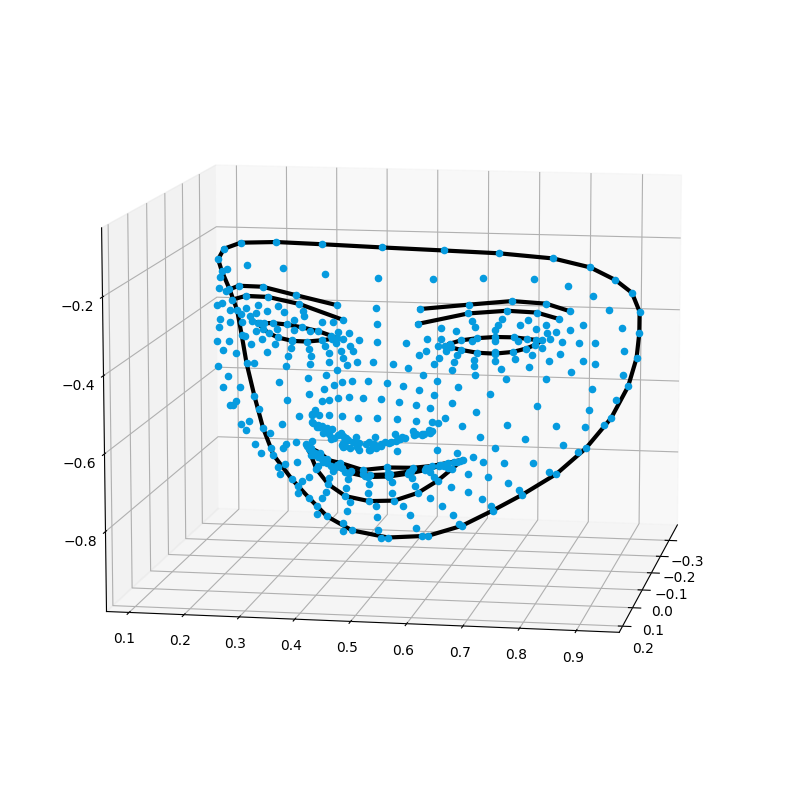

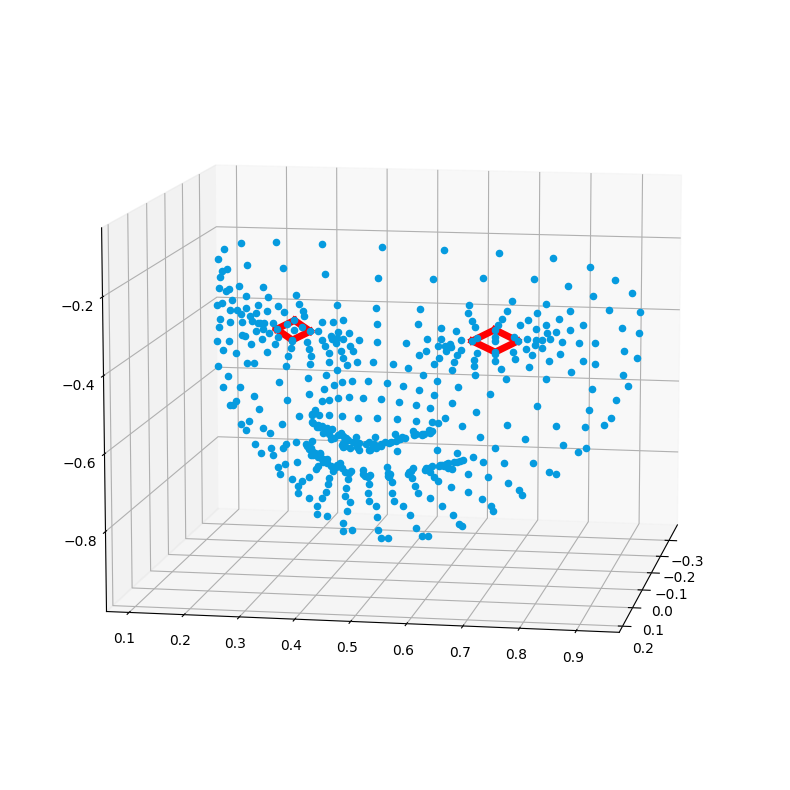

psy.jpg


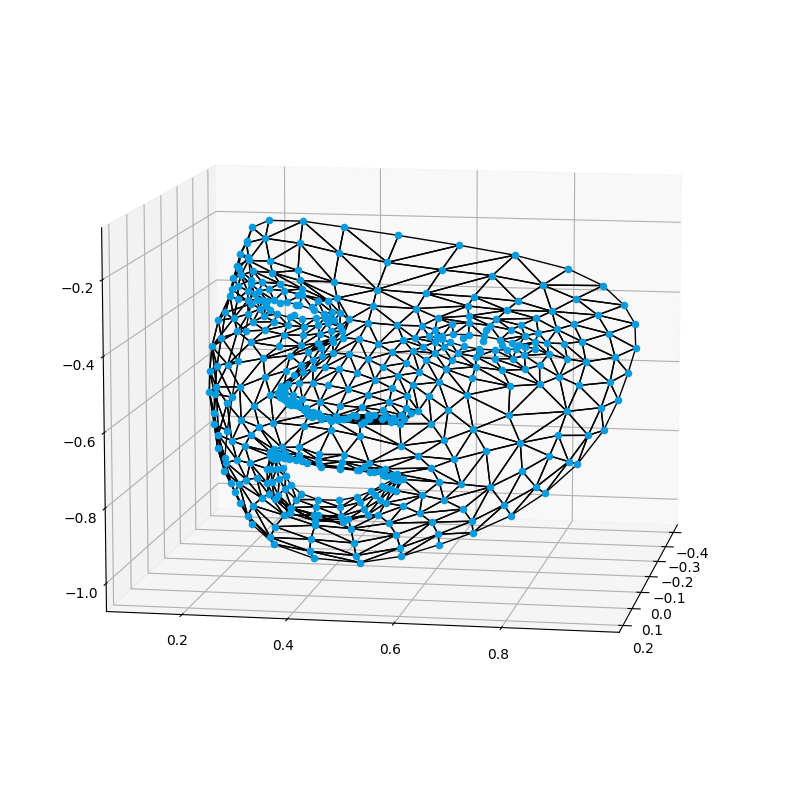

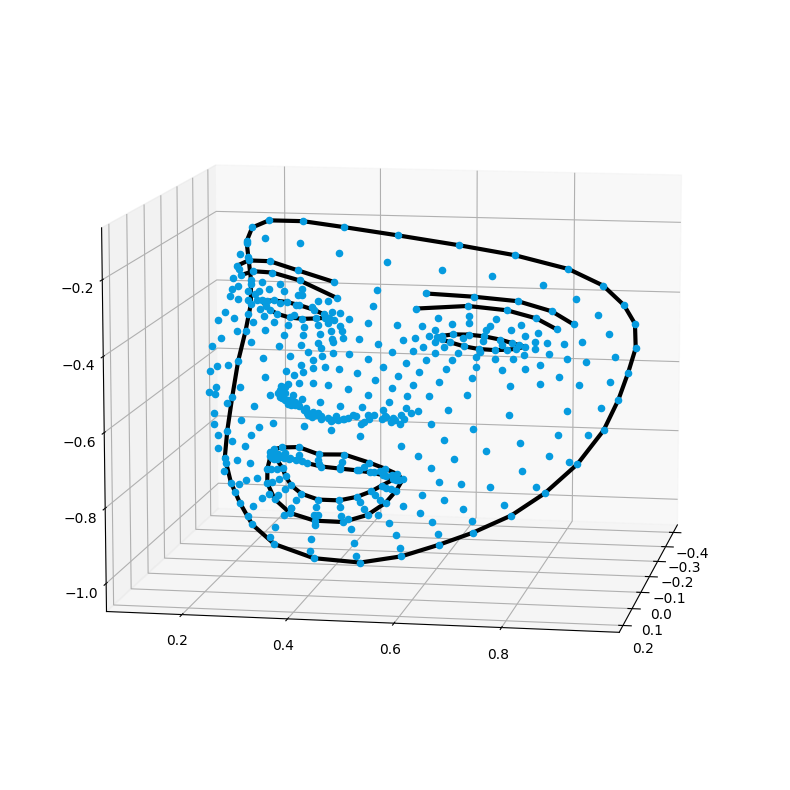

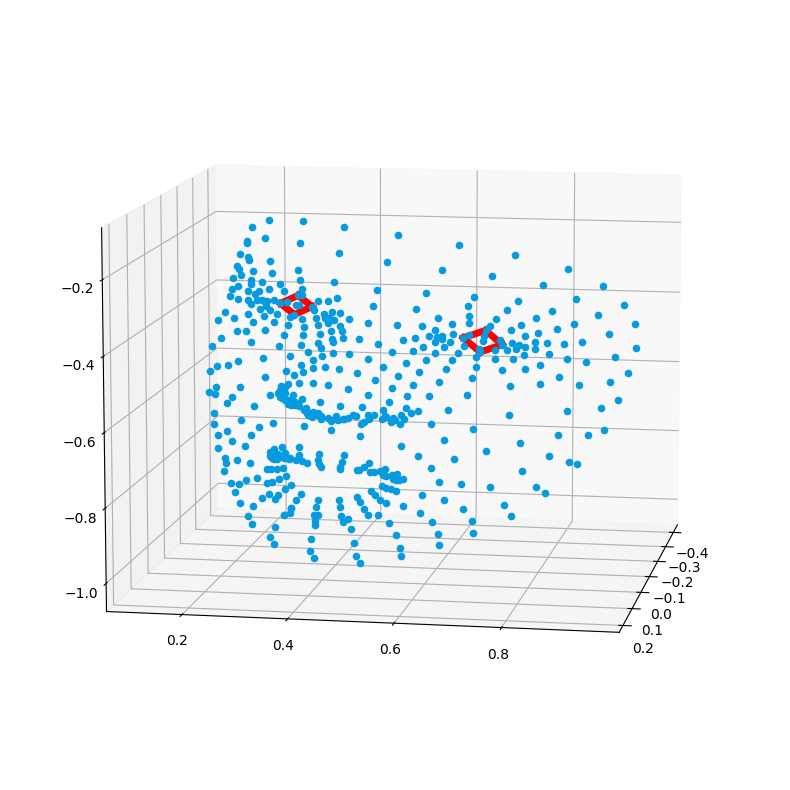

stress.jpg


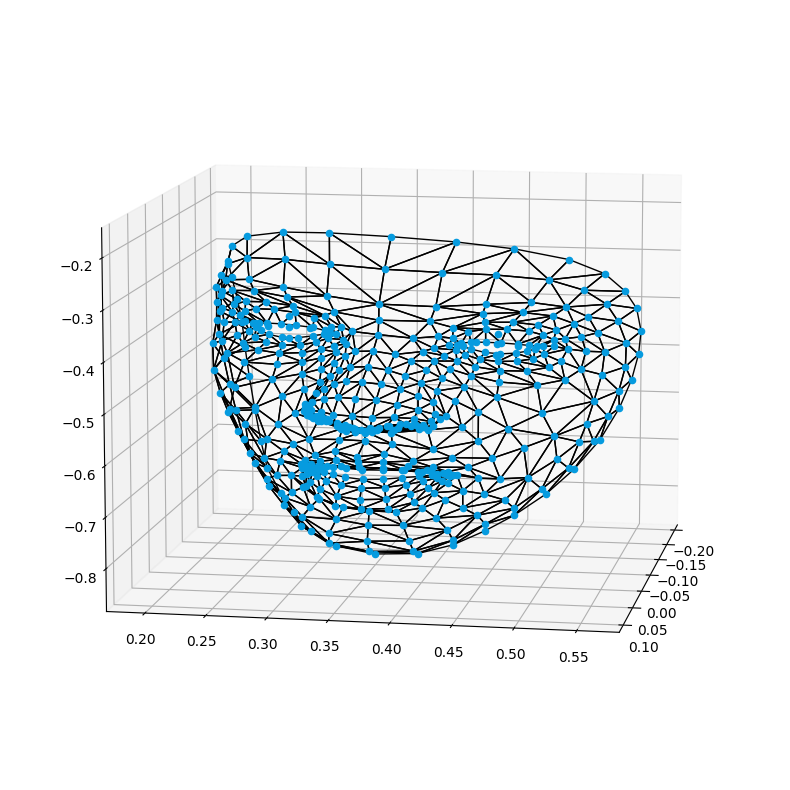

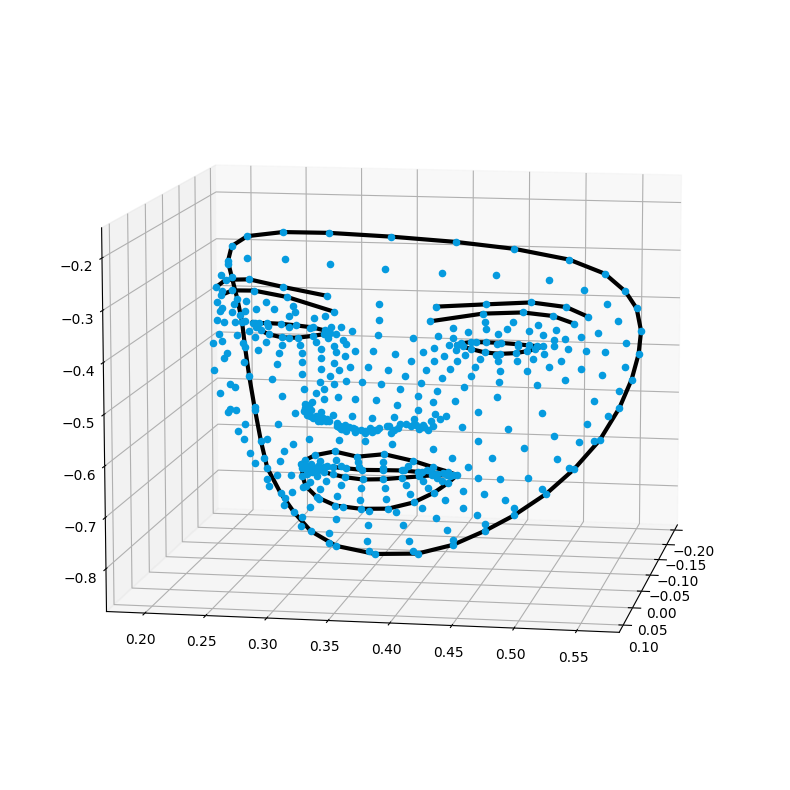

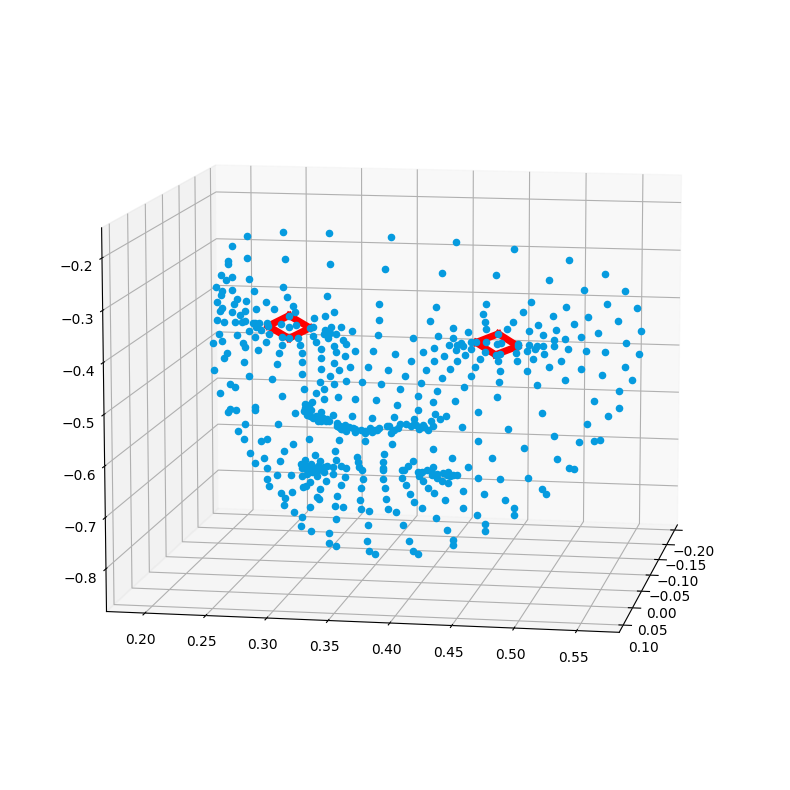

suicide.jpg


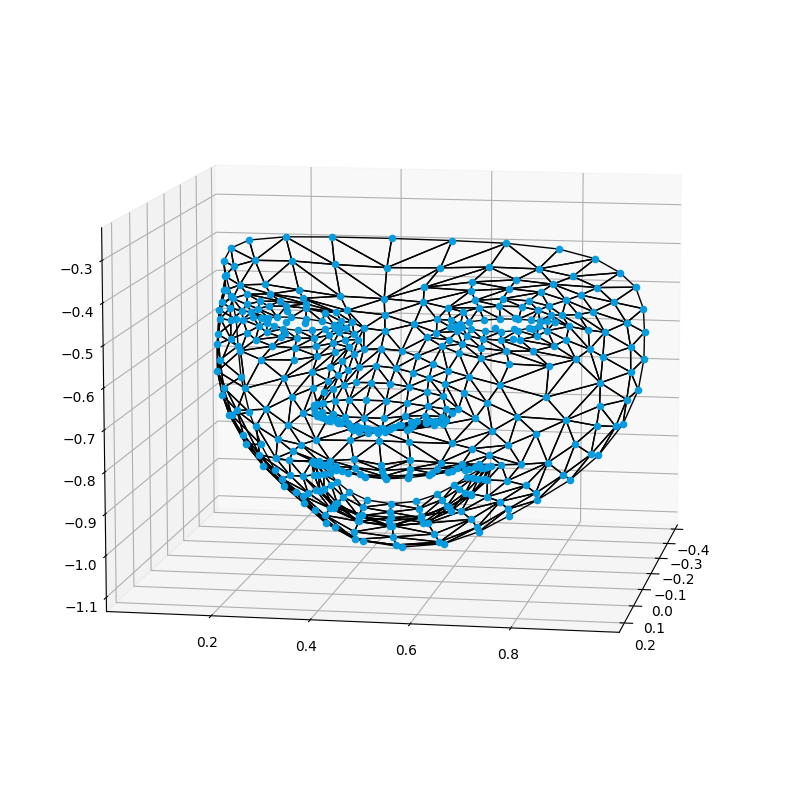

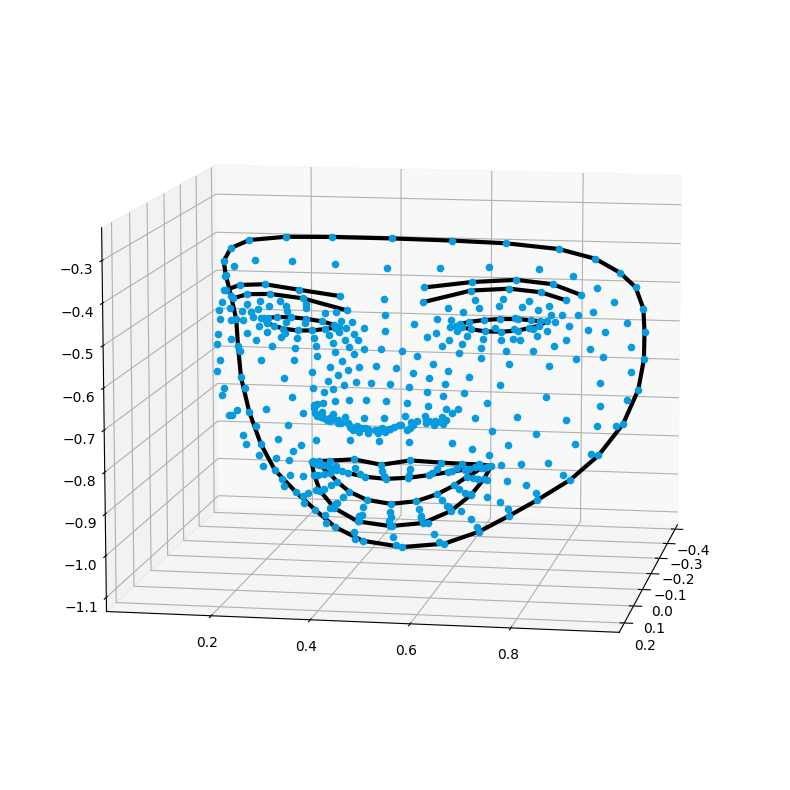

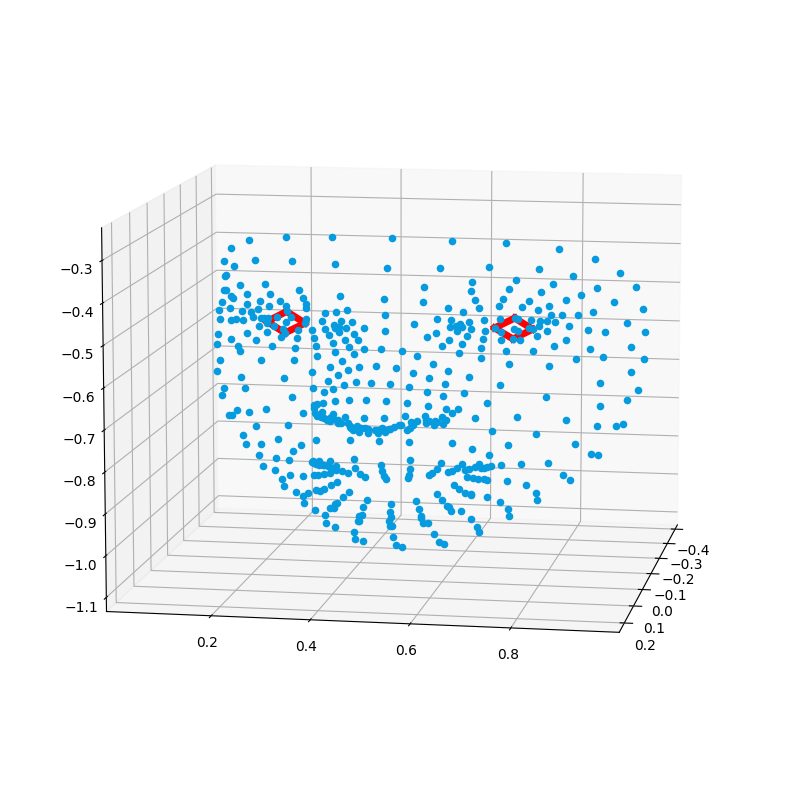

In [41]:
import cv2 as cv
import  mediapipe as mp
import numpy as np
import time
import  matplotlib.pyplot as plt

# 定义可视化图像函数
def look_img(img):
    img_RGB=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入三维人脸关键点检测模型
mp_face_mesh=mp.solutions.face_mesh
# help(mp_face_mesh.FaceMesh)

model=mp_face_mesh.FaceMesh(
    static_image_mode=True,#TRUE:静态图片/False:摄像头实时读取
    refine_landmarks=True,#使用Attention Mesh模型
    max_num_faces=40,
    min_detection_confidence=0.2, #置信度阈值，越接近1越准
    min_tracking_confidence=0.5,#追踪阈值
)


# 导入可视化函数和可视化样式
mp_drawing=mp.solutions.drawing_utils
# mp_drawing_styles=mp.solutions.drawing_styles
draw_spec=mp_drawing.DrawingSpec(thickness=1,circle_radius=1,color=[223,155,6])
draw_spec1=mp_drawing.DrawingSpec(thickness=2,circle_radius=1,color=[0,0,0])
# 读取图像
folder_list = os.listdir('../../Figure/Supplement/sup14_face/')
for f in folder_list:
    if '.jpg' in f:
        img=cv.imread(os.path.join('../../Figure/Supplement/sup14_face/', f))
        print(f)
        # width=img1.shape[1]
        # height=img1.shape[0]
        # img=cv.resize(img1,(width*10,height*10))
        # look_img(img)

        # 将图像模型输入，获取预测结果

        # BGR转RGB
        img_RGB=cv.cvtColor(img,cv.COLOR_BGR2RGB)

        # 将RGB图像输入模型，获取预测结果

        results=model.process(img_RGB)
        # # 预测人人脸个数
        # len(results.multi_face_landmarks)
        #
        # print(len(results.multi_face_landmarks))

        if results.multi_face_landmarks:
            for face_landmarks  in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=img,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_CONTOURS,
                    landmark_drawing_spec=draw_spec,
                    connection_drawing_spec=draw_spec
                )
        else:
            print('未检测出人脸')
        # look_img(img)
        draw_spec1=mp_drawing.DrawingSpec(thickness=1,circle_radius=1,color=[0,0,0])
        mp_drawing.plot_landmarks(results.multi_face_landmarks[0],mp_face_mesh.FACEMESH_TESSELATION, landmark_drawing_spec=draw_spec, connection_drawing_spec=draw_spec1)
        draw_spec1=mp_drawing.DrawingSpec(thickness=3,circle_radius=1,color=[0,0,0])
        mp_drawing.plot_landmarks(results.multi_face_landmarks[0],mp_face_mesh.FACEMESH_CONTOURS, landmark_drawing_spec=draw_spec, connection_drawing_spec=draw_spec1)
        draw_spec1=mp_drawing.DrawingSpec(thickness=5,circle_radius=1,color=[0,0,255])
        mp_drawing.plot_landmarks(results.multi_face_landmarks[0],mp_face_mesh.FACEMESH_IRISES, landmark_drawing_spec=draw_spec, connection_drawing_spec=draw_spec1)

In [14]:
a

In [13]:
import cv2
cv2.imwrite('./output_image.jpg', a)  # 替换为您想要保存的文件路径



error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [2]:
import open3d
point_cloud=open3d.geometry.PointCloud()
point_cloud.points=open3d.utility.Vector3dVector(points)
open3d.visualization.draw_geometries([point_cloud])